## Temperature and CO2 locally and Globally

#### This script is made for the learningday for technical staff at UiB the 22 of February 2024. 
*I've made this type of exercises as part of the project "Ekte Data" in collaboration with "Skolelaboratoriet" for natural sciences at UiB. The past two years we have focused on developing an intro course to programming in Python. All the exercises are based on real data sets and scientific questions. Our goal is to make the connection between natural sciences, mathematics, and programming clear. You can find more programming exercises and tools to get started [here](https://github.com/irendundas/EkteData).*
 
Vår Dundas, PhD candidate in physical oceanography at the Geophysical Institute, UiB

------------------
__________

#### Introduction round: 
- Name 
- Institute 
- Why the interest in Python?
- What type of data do you work with?
- Have you run a jupyter notebook before?  
____________
_________
The goal of this exercise is to give an intro to how you can work with data in Python. We use data of temperature and CO2 to go though: 
- **Loading data into your script** 💾
- **Use of libraries** 📖
- **Use of functions** 🎯
- **How to structure your variables** 🗃️
- **Visualization** 🎨

The cases we look at are
- Temperatureanomlies from Bergen and globally
- Linear trends for different time periods
- Anomalies in global CO2 in the atmosphere
- Different ways to present and compare data 

We use four data sets:
- Temperature data for Bergen: [download here](https://github.com/irendundas/EkteData/blob/main/data/Bergen_temp1862_2022.txt). This data set is compiled by Hele Drange, and is based on data from the Norwegian Meteorological Institute. 
- Temperature data globally: [download here](https://climate.metoffice.cloud/temperature.html#datasets) (scroll down to "Get the data" and download HadCRUT5, NOAAGlobalTemp, or GISTEMP as csv-file. In this example I use HadCRUT5). 
- CO2 data until 2004 (NOAA): [download here](https://www1.ncdc.noaa.gov/pub/data/paleo/icecore/antarctica/law/law2006.txt). These data are based on ice cores. The dataset has a lot of information we do not need, and we load it into this script in a tidy way roughly halfway into the exercise.  
- CO2 data from 1959 until today (NOAA): [download here](https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.txt) 

The temperature stripe figures in this exercise are inspired by [Ed Hawkins' original figure ](https://www.wfla.com/wp-content/uploads/sites/71/2022/06/PAGES2K-ED-HAWKINS-CLIMATE-STRIPES.jpg?w=900).


In [44]:
# Load the libraries you need 📖

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

In [45]:
SMALL_SIZE = 13
MEDIUM_SIZE = 17
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Part 1: Temperature
In this part we look at temperature anomalies. This means that we look at temperature deviations relative to a defines reference period. For HadCRUT5 the reference period is 1961–1990 ([Morice et al., 2020](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2019JD032361)).

### Import the data set of global temperature
Follow this [link](https://climate.metoffice.cloud/temperature.html#datasets) and download one of the data sets under **Global mean temperature**. Make sure that you save the file somewhere logical. 
Below I use the data from HadCRUT5.
Import the data of global temperature into Python. We use the library "Pandas". This library is perfect for working with data in 2D. If you need to import data with more than two dimensions I would recommend the library "xarray". A lot of the functionality is the same, but it's specifically tailored for multiple dimensions. 

In [46]:
# Specify which file you want to import and where on your computer it's located

# !!! Change the path below to the path where you have the file on your computer!!!
# !!! If you have the data in the same folder as this script, you don't need to specify the path. 
path='W:/Work/Documents/EkteData/ikkeGit/temperaturstriper'
file='/gmt_HadCRUT5.csv'

# Make sure that the result of path+file is exactly where you have the file on your computer
path+file

'W:/Work/Documents/EkteData/ikkeGit/temperaturstriper/gmt_HadCRUT5.csv'

Use Pandas to import the data. 
Look [here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) for an explanation of the keywords (sep, index_col etc).

To know which keyword arguments (**kwargs in the documentation) you need to use, you have to knwo what your file looks like. I always open my file in a text editor (e.g., notepad) to inspect how columns are separated, what's used as the decimal sign, if there's a header or footer etc. For this purpose you cannot open the file in e.g., excel because this information is not visible.

In [110]:
# Import the data set 💾
df = pd.read_csv(
    path+file, 
    sep=',', 
    decimal='.', 
    index_col=False, 
    header=4,
    skipinitialspace=True # Skip spaces after delimiter.
)

# From the doc: index_col=False can be used to force pandas to not use the 
# first column as the index, e.g. when you have a malformed file with 
# delimiters at the end of each line.

In [111]:
# Print out the data set to see what it looks like.Did it import properly? 
df

,Year,HadCRUT5 (degC),HadCRUT5 uncertainty
0,1850,-0.08,0.172
1,1851,0.11,0.179
2,1852,0.11,0.180
3,1853,0.07,0.160
4,1854,0.05,0.141
...,...,...,...
169,2019,1.23,0.034
170,2020,1.26,0.035
171,2021,1.10,0.036
172,2022,1.14,0.036


In [112]:
# Import the data set 💾
test = pd.read_csv(
    path+file, 
    sep=',', 
    decimal='.', 
    index_col="Year", 
    header=4,
    skipinitialspace=True, # Skip spaces after delimiter.
    parse_dates=['Year']
)
test

,HadCRUT5 (degC),HadCRUT5 uncertainty
Year,,
1850-01-01,-0.08,0.172
1851-01-01,0.11,0.179
1852-01-01,0.11,0.180
1853-01-01,0.07,0.160
1854-01-01,0.05,0.141
...,...,...
2019-01-01,1.23,0.034
2020-01-01,1.26,0.035
2021-01-01,1.10,0.036


In [113]:
test10y=test.resample('10AS').mean()
test10y

,HadCRUT5 (degC),HadCRUT5 uncertainty
Year,,
1850-01-01,0.0200,0.15620
1860-01-01,-0.0470,0.17640
1870-01-01,0.0450,0.13430
1880-01-01,-0.0310,0.11670
1890-01-01,-0.0830,0.13460
1900-01-01,-0.0970,0.12830
1910-01-01,-0.0780,0.13350
1920-01-01,0.0660,0.13210
1930-01-01,0.2030,0.10300


Text(0.5, 1.0, 'Global temperature anomalies')

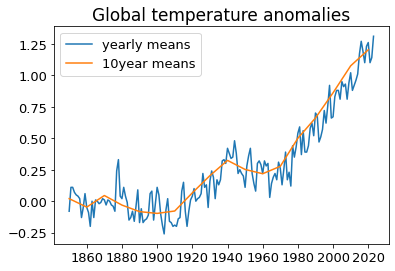

In [114]:
plt.plot(test.iloc[:,0], label='yearly means')
plt.plot(test10y.iloc[:,0], label='10year means')
plt.legend()
plt.title('Global temperature anomalies')

In [ ]:
# 🗃️
# Make two empty "dictionaries". One for time and one for temperature so that you don't have to keep control of so many 
# variables when we also import time and temp from Bergen below
time, temp={},{}

In [ ]:
# Give the first column (iloc[:,0]) to "time" oand the second column (iloc[:,1]) to "temp" 🗃️
time['Global']=np.copy(df.iloc[:,0])
temp['Global']=np.copy(df.iloc[:,1])

In [ ]:
# Make a figure to get a sense of the data 🎨
plt.plot(time['Global'], temp['Global'])

### Import the data set over temperature in Bergen
The data set is available [here](github.com/irendundas/EkteData/blob/main/data/Bergen_temp1862_2022.txt).


In [ ]:
# 💾
path='W:/Work/Documents/EkteData/EkteData/data'
file='/Bergen_temp1862_2022.txt'

# "Keyword arguments" here are a bit different from da data import above because the dataset from Bergen is a bit
# differently organized than the global data set.
df = pd.read_csv(
    path+file, 
    sep=' ', 
    decimal='.', 
    index_col=False, 
    header=5,
    skipinitialspace=True 
)

In [ ]:
df

In [ ]:
# Save time and temperature as their own variables in the dictionaries time and temp: 🗃️

time['Bergen']=np.copy(df.iloc[:,0])
# We want to look at anomalies, so we set the third column to temp['Bergen']
temp['Bergen']=np.copy(df.iloc[:,3]) 

In [ ]:
# Plot temperature from both global and Bergen in the same figure 🎨
plt.figure(figsize=(10,5))

plt.plot(time['Global'], temp['Global'], label='Global')
plt.plot(time['Bergen'], temp['Bergen'], label='Bergen')
plt.legend()
plt.ylabel('Temperature anomalies')
plt.xlim([1850,2023])
plt.show()

**Questions**

- Why do the temperature anomalies vary so much more from year to year in Bergen than globally?
- Why is the variability still so similar on longer time scales?

_____________
## Part 2: Trends - long term changes in Bergen: 

**NB! For the "Learning day for technical employees at UiB": run quickly through the following cells until the cell that reads "Does a second order polynomial describe the change in temperature better than the linear trend?".**

Estimate three trend lines, e.g.:
- One for the whole data set, 
- one for the period from when I'm born until today, and
- one for the period from when you're born (ca 1970?) until today. 

In [ ]:
# Find the index of year 1994 and 1970. 🎯
id94=np.where(time['Bergen']==1994)[0][0]
id70=np.where(time['Bergen']==1970)[0][0]

# Check that the indices we found are correct. 
time['Bergen'][id94], time['Bergen'][id70]

In [ ]:
# 🎨
plt.figure(figsize=(10,5))
# The whole time series
plt.plot(time['Bergen'], temp['Bergen'], 'C1', label='Bergen') 
# The trend of the whole time series🎯
a, b = np.polyfit(time['Bergen'], temp['Bergen'], 1) 
plt.plot(time['Bergen'], a*time['Bergen'] + b, 'k', label='trend: 1860-2023')
 # The trend since 1970
a, b = np.polyfit(time['Bergen'][id70:], temp['Bergen'][id70:], 1)
plt.plot(
    time['Bergen'][id70:], a*time['Bergen'][id70:] + b, 
    'k', label='trend: 1970-2023', ls=':'
)
# The trend since 1994
a, b = np.polyfit(time['Bergen'][id94:], temp['Bergen'][id94:], 1) 
plt.plot(
    time['Bergen'][id94:], a*time['Bergen'][id94:] + b, 
    'k', label='trend: 1994-2023', ls='--'
)

plt.legend()
plt.ylabel('Temperature anomaly')

plt.grid()
plt.show()

In [ ]:
a, b = np.polyfit(time['Bergen'], temp['Bergen'], 1) # The trend of the full time series
x=(a*time['Bergen'][-1] + b)-(a*time['Bergen'][0] + b)
x="{:.1f}".format(x) # Only print out one decimal. 🎯

print(
    'The trend indicates that for the full period, the temperature in Bergen has increased by ', 
    x, 'grader'
)

In [ ]:
# Plotting the figure is more tidy with a for-loop 🎯🎨
plt.figure(figsize=(10,5))

plt.plot(time['Bergen'], temp['Bergen'], 'C1', label='Bergen')

idt=[0, id70, id94]
labels=['trend: 1860-2023', 'trend: 1970-2023', 'trend: 1994-2023']
ls=['-', ':', '--'] # Linestyle
for count,start in enumerate(idt):
    a, b = np.polyfit(time['Bergen'][start:], temp['Bergen'][start:], 1)   
    plt.plot(
        time['Bergen'][start:], a*time['Bergen'][start:] + b, 
        'k', label=labels[count], lw=2, ls=ls[count]
    )
plt.ylabel('Temperature anomaly')
plt.legend()
plt.show()


**Questions**
- What is the difference between the trend lines?
- What happens to the trend lines when the start date for the estimation period increases?
- What does this mean physically?

**Can you trust the trend lines?**
- Estimate the trend for the two periods 1977-2000 and 1990-2013.
- Assume that both the trends represent the change in temperature for Bergen for the past 160 years. 
    - According to trend nr 1, how much has the trend increased since the beginning of the time series?
    - And avvording to trend nr 2?
    


In [ ]:
# 🎨
plt.figure(figsize=(10,5))
# The whole time series 
plt.plot(time['Bergen'], temp['Bergen'], 'C1', label='Bergen') 
id1=np.where(time['Bergen']==1990)[0][0]
id2=np.where(time['Bergen']==2013)[0][0]+1
# The trend between 1990 and 2013
a, b = np.polyfit(time['Bergen'][id1:id2], temp['Bergen'][id1:id2], 1)
print('change the past 160 years: ', a*160, 'degrees')
plt.plot(
    time['Bergen'][id1:id2], a*time['Bergen'][id1:id2] + b, 
    'k', label='trend: 1990-2013', ls='--'
)
id1=np.where(time['Bergen']==1977)[0][0]
id2=np.where(time['Bergen']==2000)[0][0]+1
# The trend between 1977 and 2000
a, b = np.polyfit(time['Bergen'][id1:id2], temp['Bergen'][id1:id2], 1)
print('change the past 160 years: ', a*160, 'degrees')
plt.plot(
    time['Bergen'][id1:id2], a*time['Bergen'][id1:id2] + b, 
    'k', label='trend: 1977-2000', ls='-'
)

plt.legend()
plt.ylabel('Temperature anomaly')
plt.xlim(1960, 2023)
plt.grid()
plt.show()

- The difference is large! Always make sure that trends you present (or someone presents to you) are robust. Trends should not be strongly influenced by the choice of start and end. 


_____________
### Does a second order polynomial describe the change in temperature better than the linear trend?

In [ ]:
# 🎨
plt.figure(figsize=(10,5))
plt.plot(time['Bergen'], temp['Bergen'], 'C1', label='Bergen')
# The trend of the full time series
a, b = np.polyfit(time['Bergen'], temp['Bergen'], 1) # 🎯
plt.plot(time['Bergen'], a*time['Bergen'] + b, 'k', label='lineær tilpasning', ls='-')

# Second order polynomial fitted to the data
a = np.polyfit(time['Bergen'], temp['Bergen'], 2) 
plt.plot(
    time['Bergen'], 
    a[0]*time['Bergen']**2 + a[1]*time['Bergen'] + a[2], 
    'k', label='second order polynomial', ls='--'
)
plt.ylabel('Temperature anomaly')
plt.legend()
plt.show()

**Question**
- What kind of information do we get from the second order polynomial that we did not get from the linear trend line?

**Exercise: What about the trend of the Global temperature?**
- Estimate the trendline for the global time series. 
- Plot the global trend line and the trend line for Bergen in the same figure to compare them.
- Tip: Start the time series in 1862 to that the two time series cover the same period. 

In [ ]:
time['Bergen'][0], time['Global'][0]

In [ ]:
id62=np.where(time['Global']==1862)[0][0] # 🎯

a, b = np.polyfit(time['Global'][id62:], temp['Global'][id62:], 1)   
plt.plot(time['Global'][id62:], a*time['Global'][id62:] + b, label='Global')

a, b = np.polyfit(time['Bergen'], temp['Bergen'], 1)   
plt.plot(time['Bergen'], a*time['Bergen'] + b, label='Bergen')
# If you prefer, ou can use the "np.polyval" function when plotting the trend. 
# This is reduces the potential for error if you are plotting a polynomial of higher order. 
plt.plot(time['Bergen'], np.polyval([a,b], time['Bergen']), label='Bergen', ls=':')
plt.legend()
plt.ylabel('Temperature trend')

plt.show()

**Question**
- What does the two linear trends tell us about the global temperature change vs the temperature change in Bergen?

______________

### Temperature stripes 🎨
**Plot the time series as a histogram with the colors used in the original "temperature stripe"-figure made by [Ed Hawkins](https://www.wfla.com/wp-content/uploads/sites/71/2022/06/PAGES2K-ED-HAWKINS-CLIMATE-STRIPES.jpg?w=900).**

In [ ]:
# This creates a color map that uses the colors from the original temperature stripe figure
# There are 8 blue and 8 red colors. 🎯
cmap = ListedColormap([
    '#08306b', '#08519c', '#2171b5', '#4292c6',
    '#6baed6', '#9ecae1', '#c6dbef', '#deebf7',
    '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a',
    '#ef3b2c', '#cb181d', '#a50f15', '#67000d',
])

# Note that this is not how I would usually specify a color - RGB is more intuitive. But since we want the 
# exact colors we use hex codes as here. 

NOTE: In the code three cells below you'll see this line: `color=cmap((temp['Global']+max_anomaly)/(2*max_anomaly))`, where `max_anomaly=max(temp['Global'])` is specified just below. This makes the barplot take the normalized temperature time series as its colors. It's a bit complicated to explain how this works, and it's not the main point of this exercise, so feel free to skip the explanation of this below. 

We want all the temperature anomalies that are below 0 to be blue, and all the anomalies that are over 0 to be red. Further, we want the maximum positive anomalies to be the darkest red color. To achieve this we normalize the temperature values to be between 0 and 1. This happens here: `(temp['Global']+max_anomaly)/(2*max_anomaly)`. See the figure below. 

The non-normalized anomalies in the beginning of the time series are close to 0. After the normalizing these values are close to 0.5, i.e., just between 0 and 1. When plotting the temperature stripes the bars in the start are therefore very pale because the colors at the middle of the colormap we made are close to white. Towards the end of the time series, the termperature anomalies reaches its maximum, and the colors are therefore the darkest red of our colormap. The variable `max_anomaly` is the largest temperature anomaly. By using this value in the nomalizing the largest anomaly gets the darkest red color. 


In [ ]:
max_anomaly=max(temp['Global']) # 🎯

In [ ]:
# This figure shows that anomalies near 0 becomes 0.5, while the maximum anomaly becomes 1 after the nomalizing.
# If there were negative anomalies that were as strong as the positive anomalies, these would have been zero, 
# and they would be dark blue in the bar plot.
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
plt.plot((temp['Global']+max_anomaly)/(2*max_anomaly), label='normalized')
plt.plot(temp['Global'], label='not normalized')
plt.legend(ncol=2)
plt.grid()

In [ ]:
# 🎯🎨
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
plt.bar(
    time['Global'], temp['Global'], 
    color=cmap((temp['Global']+max_anomaly)/(2*max_anomaly)) # normalize data values to the range [0, 1]
) 
    
plt.plot(time['Global'], temp['Global'], 'k', linewidth=0.5)
plt.ylabel('Temperature anomaly [°C]')
plt.title('Global')
plt.ylim(-2, 2.4)

Normalize the plot of Bergen data with the global temperature maxima so that the two plaots can be compared. 

In [ ]:
# 🎯🎨
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
plt.bar(time['Bergen'], temp['Bergen'], color=cmap((temp['Bergen']+max_anomaly)/(2*max_anomaly)))
plt.ylim(-2, 2.4)

# Add the trends from earlier
idt=[0, id70]
for count,start in enumerate(idt):
    a, b = np.polyfit(time['Bergen'][start:], temp['Bergen'][start:], 1)   
    plt.plot(
        time['Bergen'][start:], a*time['Bergen'][start:] + b, 
        'k', linewidth=1
    )
plt.ylabel('Temperature anomaly [°C]')
plt.title('Bergen')


Note that in the barplot of Bergen there are som dark blue colors as well. This is because there were both strong negative and positive anomalies during this period in Bergen. 

________________________
### Part 3: CO2 in the atmosphere 💾

The relationship between temperature and the CO2 in the atmosphere becomes clear if we plot CO2 in the same figure as temperature. 

We have to use two data sets over CO2 and combine them since one of them ends in 2004 and the other starts in 1959.The former is based on ice cores from Law station in Antarctica, while the latter is from Mauna Loa in Hawaii. 

In [ ]:
# Load the data set ove CO2 from ice cores collected in Antarctica (1832-2004) 💾
sti=r'W:\\Work\\Documents\\EkteData\\ikkeGit\\temperaturstriper'
fil=r'\\Law_co2_complete.txt'

df = pd.read_csv(
    sti+fil, 
    delim_whitespace=True,
    decimal='.', 
    index_col=False, 
    # there are 2013 lines with information at the start of the data set that we don't need
    skiprows=2013, 
    # there are 3676-2187 lines with information at the end of the data set that we don't need,
    # i.e., the file has 3676 lines, and the info we need ends on line 2187
    skipfooter=3676-2187,
    engine='python'
)

In [ ]:
df

In [ ]:
# 🗃️
timeco2_law=np.copy(df.iloc[:,0])
co2_law=np.copy(df.iloc[:,5])

In [ ]:
# 🎨
plt.plot(timeco2_law, co2_law)
plt.ylabel('CO2')

In [ ]:
# Load the data set of CO2 from direct observations (1959-) 💾
fil='/NOAA_CO2.txt'

df = pd.read_csv(
    sti+fil, 
    sep=' ', 
    decimal='.', 
    skipinitialspace=True,
    skiprows=55
)

In [ ]:
# 🗃️
timeco2_noaa=np.copy(df.iloc[:,0])
co2_noaa=np.copy(df.iloc[:,1])

In [ ]:
# 🎨
plt.plot(timeco2_law, co2_law)
plt.plot(timeco2_noaa, co2_noaa)
plt.ylabel('CO2')


In [ ]:
print(
    'The data sets overlap. The data set from Law ends in',
    timeco2_law[-1], 
    'while the data set from Mauna Loa starts in',
    timeco2_noaa[0]
)

In [ ]:
# 🗃️ 🎯
# To combine the two data sets we use the mean of the two sources in the period that overlaps. 
# The figure above gives us confidence that this is reasonable. 
# We make two new variables: timeco2 and co2

# First, make the new time vector with np.arange(). 
# np.arange() takes three inputs: start, stop, and step.
timeco2=np.arange(timeco2_law[0], timeco2_noaa[-1]+1, 1)

In [ ]:
# Make an empty array that we can fill with the CO2 data 🗃️ 🎯
# Give this one two columns so that we can fill data from Law into one column and data from Muana Loa in the other.
# But: Let them have the same time vector and fill the columns with NaN where the two respective time series do not have data. 
co2=np.nan*np.zeros((len(timeco2),2))

In [ ]:
# 🗃️
# Fill data from Law into column 0
# This spans years 1832 through 2004
id2004=np.where(timeco2_law==timeco2_law[-1])[0][0]+1 # +1 because of "through 2004"
co2[:id2004, 0]=co2_law

# Fill data from Muana Loa into column 1
# This spans years 1959 through 2022 (or later depending on when you downloaded the data)
id1959=np.where(timeco2==timeco2_noaa[0])[0][0]
co2[id1959:, 1]=co2_noaa

# Redefine the variable "co2" to be the average of the variable "co2" 🎯
co2=np.nanmean(co2,1)

In [ ]:
# 🎨
# Plot CO2 from Law and Muana Loa as thin black lines in the background
plt.plot(timeco2_law, co2_law, 'k', lw=.5, label='Law')
plt.plot(timeco2_noaa, co2_noaa, 'k', lw=.5, label='Muana Loa')
# Plot CO2 as the average from Law and Muana Loa above in blue 
# to check that the estimate is sensible. 
plt.plot(timeco2, co2, label='Average')
plt.ylabel('CO2')
plt.legend()

# This is a reasonable solution since the overlapping measurements have very similar values. 

_____________________________
### Everything wrapped up:
#### Make a figure with temperature stripes, a second order fitted polynomial, and global CO2

In [ ]:
# 🎨
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
ax.bar(
    time['Global'], temp['Global'], 
    color=cmap((temp['Global']+max_anomaly)/(2*max_anomaly)) # normalize data values to the range [0, 1]
) 
plt.title('Global')
ax.set_ylim(-0.5, 1.4)

# Add the polynomial
a,b,c = np.polyfit(time['Global'], temp['Global'], 2)   
ax.plot(
    time['Global'], a*time['Global']**2 
    + b*time['Global'] + c, 
    'k'
)
plt.ylabel('Temperature anomaly [°C]')
    
# Add global CO2
ax2=ax.twinx()
ax2.plot(timeco2, co2, 'C2', linewidth=3)
# Adjust the y-axis of the figure to show the information more clearly. 
ax2.set_ylim(250, 430)

ax2.spines['right'].set_color('C2')
ax2.tick_params(axis='y', colors='C2')
ax2.yaxis.label.set_color('C2')
ax2.set_ylabel('Global CO2')
plt.xlim(time['Global'][0], time['Global'][-1])
plt.show()

#### Honest data visualization
In the figure above, we've adjusted the left and right y-axis so that the figure clearly shows what we want to communicate, i.e., that temperature and CO2 is related. 

But how do you feel about this? Is it ok to adjust the axis as we want?

It's important to conciously visualizing data and results in an honest way. Double y-axis can be a good way to indicate a relationship between two variables, but it can also be a pit fall as illustrated below:

In [ ]:
# 🎨
# Make a subplot with three panels
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# Make one set of left hand y-limits for each panel
ylim=[(-0.5, 1.4), (-0.5, 1.4), (-5, 20)] # ylim for temperature
# Make one set of right hand y-limits for each panel
ylim2=[(-500, 1000), (250, 430), (250, 430)] # ylim for CO2

for count, ax in enumerate(axs): # Loop through the three panels of the subplot
    # Adjust the left axis in the figure
    ax.set_ylim(ylim[count])

    # Polynomial from earlier
    a,b,c = np.polyfit(time['Global'], temp['Global'], 2)   
    ax.plot(
        time['Global'], a*time['Global']**2 
        + b*time['Global'] + c, 'k'
    )
        
    # Global CO2
    ax2=ax.twinx()
    ax2.plot(timeco2, co2, 'C2', linewidth=3)
    # Adjust the y-axis of the figure to show the information more clearly. 
    ax2.set_ylim(ylim2[count])
    ax2.spines['right'].set_color('C2')
    ax2.tick_params(axis='y', colors='C2')
    ax2.yaxis.label.set_color('C2')


    plt.xlim(time['Global'][0], time['Global'][-1])
ax2.set_ylabel('Global CO2')
axs[0].set_ylabel('Temperature anomaly [°C]')
axs[1].set_title('Global')
plt.subplots_adjust(wspace=.8)

plt.show()

The impression of the relationship between CO2 and temperature is completely dependent on which axis limits we use. A way to check is the changes in each variable is comparable is to look at the normalized time series. This gives a more robust impression of whether the changes are robust relative to internal variability and the mean value or not. 

The figure below show that both the temperature changes and the CO2 changes are on the same scale. This gives us more confidence that it's ok to use double y-axes with adjusted limits. 

In [ ]:
# Normalized trend lines and CO2 🎨

# Temp
a,b,c = np.polyfit(time['Global'], temp['Global'], 2)   
var=a*time['Global']**2 + b*time['Global'] + c
# Normaliser: (var-mean)/std
var=(var-np.mean(var))/np.std(var)
plt.plot(time['Global'], var, 'C0', label='Global')

a,b,c = np.polyfit(time['Bergen'], temp['Bergen'], 2)   
var=a*time['Bergen']**2 + b*time['Bergen'] + c
var=(var-np.mean(var))/np.std(var)
plt.plot(time['Bergen'], var, 'C1', label='Bergen')

# CO2
var=(co2-np.mean(co2))/np.std(co2)
plt.plot(timeco2, var, 'k', linewidth=3, label='CO2')

plt.xlim(time['Global'][0], time['Global'][-1])
plt.ylabel('Temperature anomaly [°C]')
plt.legend()

plt.show()

NOTE: another feature to be specifically careful with is the use of colormaps: do not use rainbow/hsv/jet, i.e., "Miscellaneous" colormaps. These colormaps have uneven transitions between the colors which creates an impression of large changes in data values where this is not necessarily true. 

#### Now that we're convinced that the relationship between temperature and CO2 is robust, we make the same figure for Bergen

In [ ]:
# 🎨
fig, ax=plt.subplots(1, 1, figsize=(10, 4))
ax.bar(
    time['Bergen'], temp['Bergen'], 
    color=cmap((temp['Bergen']+max_anomaly)/(2*max_anomaly)) #normalize data values to the range [0, 1]
) 
plt.title('Bergen')
ax.set_ylim(-1.5, 2.4)

# Polynomial from earlier
a,b,c = np.polyfit(time['Bergen'], temp['Bergen'], 2)   
ax.plot(
    time['Bergen'], a*time['Bergen']**2 
    + b*time['Bergen'] + c, 'k'
)
plt.ylabel('Temperature anomaly [°C]')
    
# Add global CO2
ax2=ax.twinx()
ax2.plot(timeco2, co2, 'C2', linewidth=3)
ax2.set_ylim(200, 530)
ax2.spines['right'].set_color('C2')
ax2.tick_params(axis='y', colors='C2')
ax2.yaxis.label.set_color('C2')
ax2.set_ylabel('Bergen CO2')

plt.xlim(time['Bergen'][0], time['Bergen'][-1])
plt.show()

**Questions**
- What do you think the global temperature anomaly will be in 2040? Which assumptions do you make to arrive at your result? 
- What do you think the temperature anomaly in Bergen will be in 2040?
- Which answer do you trust the most? Your anwer regarding Bergen or globally?
___________________

#### A second note about honest visualization
Another aspect to be especially aware of is the use of colormaps: Do not use "rainbow", "hsv", "jet", and other similar color maps! Such color maps are called "Miscellaneous" and have uneven rtansitions between colors that create an impression of large changes where this is not necessarily the case.

See the example below. The first figure shows the global temperature time series using the same colormat as the figures above. The second figure uses "hsv". It's now a lot more difficult to see where abrupt changes actually happen and when the colormap just "invents" abrupt changes.

In [ ]:
plt.figure(figsize=(10, 2))
var=np.tile(temp['Global'], (2, 1))
plt.contourf(time['Global'], [0,1], var, 26, vmin=-1.5, vmax=1.5, cmap=cmap)
plt.colorbar()

In [ ]:
plt.figure(figsize=(10, 2))
var=np.tile(temp['Global'], (2, 1))
plt.contourf(time['Global'], [0,1], var, 26, vmin=-1.5, vmax=1.5, cmap='hsv')
plt.colorbar()